In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [14]:
data = pd.read_csv("datos_procesos.csv", sep = "|")
data

,ID_Proceso,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Tipo_Proceso,Estado
0,1,37.454012,59.515562,16,8.184879,3,Aplicación,0
1,2,95.071431,36.471714,18,76.195256,8,Aplicación,0
2,3,73.199394,0.537562,21,46.991138,3,Aplicación,0
3,4,59.865848,56.108773,28,87.884325,4,Aplicación,0
4,5,15.601864,89.657041,39,4.622599,1,Sistema,0
...,...,...,...,...,...,...,...,...
999995,999996,88.808083,46.057947,29,27.258890,4,Servicio,0
999996,999997,43.731876,90.516047,36,5.368654,7,Sistema,0
999997,999998,41.807198,68.311082,9,63.019433,4,Sistema,0
999998,999999,42.867126,33.865907,48,4.543244,8,Servicio,0


In [15]:
data = data.drop(columns = ["ID_Proceso"])
data

,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Tipo_Proceso,Estado
0,37.454012,59.515562,16,8.184879,3,Aplicación,0
1,95.071431,36.471714,18,76.195256,8,Aplicación,0
2,73.199394,0.537562,21,46.991138,3,Aplicación,0
3,59.865848,56.108773,28,87.884325,4,Aplicación,0
4,15.601864,89.657041,39,4.622599,1,Sistema,0
...,...,...,...,...,...,...,...
999995,88.808083,46.057947,29,27.258890,4,Servicio,0
999996,43.731876,90.516047,36,5.368654,7,Sistema,0
999997,41.807198,68.311082,9,63.019433,4,Sistema,0
999998,42.867126,33.865907,48,4.543244,8,Servicio,0


In [16]:
data.describe()

,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Estado
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,50.033449,49.947866,25.030640,50.043250,5.003483,0.064631
std,28.859113,28.851514,14.150159,28.829111,2.237005,0.245874
min,0.000052,0.000038,1.000000,0.100083,0.000000,0.000000
25%,25.034021,24.999623,13.000000,25.074789,3.000000,0.000000
50%,50.055597,49.895350,25.000000,50.040186,5.000000,0.000000
75%,75.009673,74.924148,37.000000,75.030119,6.000000,0.000000
max,99.999831,99.999938,49.000000,99.999992,19.000000,1.000000


In [17]:
data.isna().sum()

Uso_CPU             0
Uso_Memoria         0
Numero_Hilos        0
Tiempo_Ejecucion    0
Numero_Errores      0
Tipo_Proceso        0
Estado              0
dtype: int64

In [18]:
data.duplicated().sum()

np.int64(0)

In [19]:
data.dtypes

Uso_CPU             float64
Uso_Memoria         float64
Numero_Hilos          int64
Tiempo_Ejecucion    float64
Numero_Errores        int64
Tipo_Proceso         object
Estado                int64
dtype: object

In [20]:
num_vars = ["Uso_CPU", "Uso_Memoria", "Numero_Hilos", "Tiempo_Ejecucion", "Numero_Errores"]
cat_vars = ["Tipo_Proceso"]

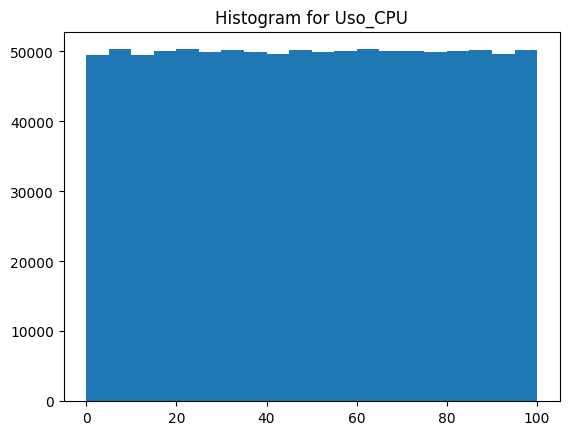

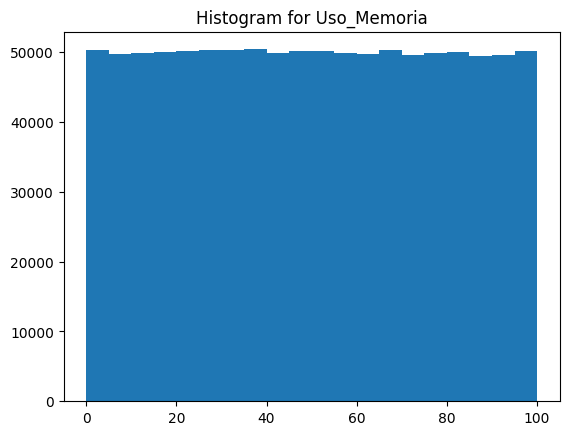

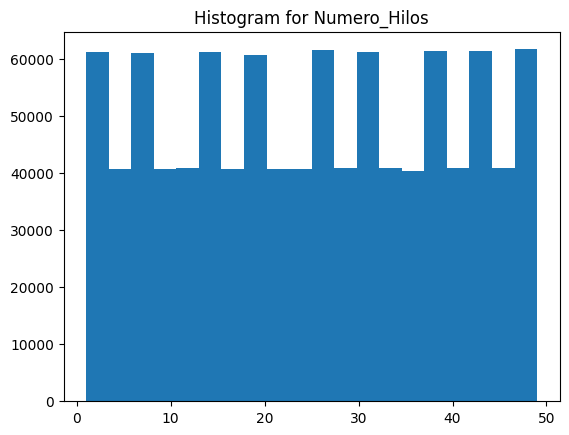

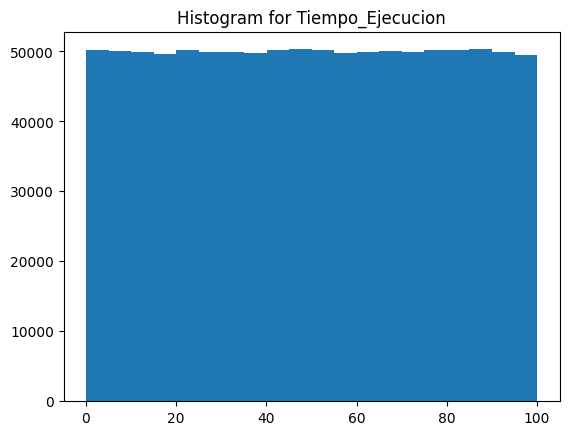

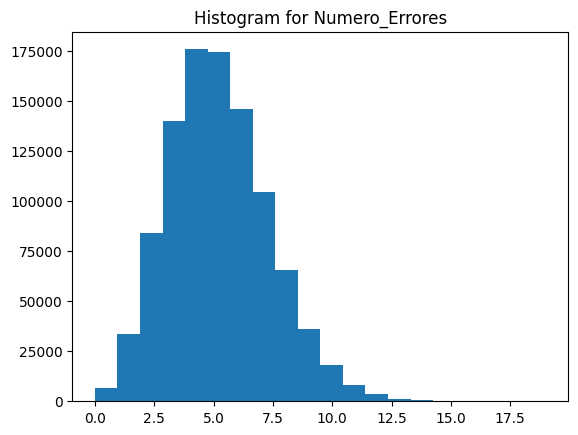

In [21]:
for i in num_vars:
    plt.figure()
    plt.hist(data[i], bins = 20)
    plt.title(f"Histogram for {i}")
    plt.show()

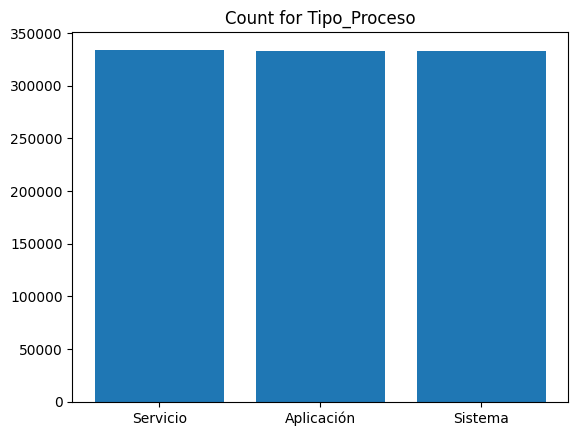

In [22]:
p_type = data["Tipo_Proceso"].value_counts().index
p_t_count = data["Tipo_Proceso"].value_counts().values

plt.figure()
plt.bar(p_type, p_t_count)
plt.title("Count for Tipo_Proceso")
plt.show()

<Axes: >

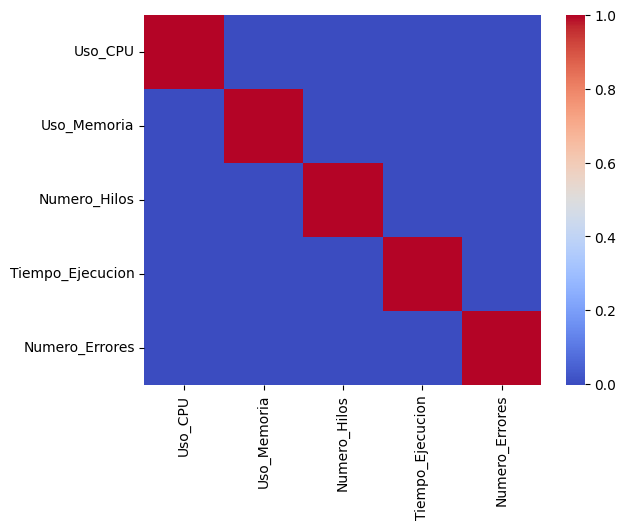

In [23]:
corr = data[num_vars].corr()
sns.heatmap(corr, cmap = "coolwarm")

In [24]:
data_num = data[num_vars]
data_cat = data[cat_vars]

one_hot = OneHotEncoder(sparse_output = False)
data_cat = one_hot.fit_transform(data_cat)
cat_columns = one_hot.get_feature_names_out()
data_cat = pd.DataFrame(data_cat, columns = cat_columns)

data_final = pd.concat([data_num, data_cat, data["Estado"]], axis = 1)
data_final.to_csv("./data_procesada.csv", index = False)
data_final

,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Tipo_Proceso_Aplicación,Tipo_Proceso_Servicio,Tipo_Proceso_Sistema,Estado
0,37.454012,59.515562,16,8.184879,3,1.0,0.0,0.0,0
1,95.071431,36.471714,18,76.195256,8,1.0,0.0,0.0,0
2,73.199394,0.537562,21,46.991138,3,1.0,0.0,0.0,0
3,59.865848,56.108773,28,87.884325,4,1.0,0.0,0.0,0
4,15.601864,89.657041,39,4.622599,1,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
999995,88.808083,46.057947,29,27.258890,4,0.0,1.0,0.0,0
999996,43.731876,90.516047,36,5.368654,7,0.0,0.0,1.0,0
999997,41.807198,68.311082,9,63.019433,4,0.0,0.0,1.0,0
999998,42.867126,33.865907,48,4.543244,8,0.0,1.0,0.0,0
